In [2]:
'''
Read the stack file from the ./data/stack.pkl file
and plot the supermaster scene and the slave scenes
on top of it using the geopandas folium libraries
'''

#%% import the reuired libraries
import pickle
import geopandas as gpd
import folium
from shapely import wkt

S1A_IW_SLC__1SDV_20190626T155602_20190626T155630_027852_032500_0D6A-SLC
35.92656485480066 -1.7018139975492397


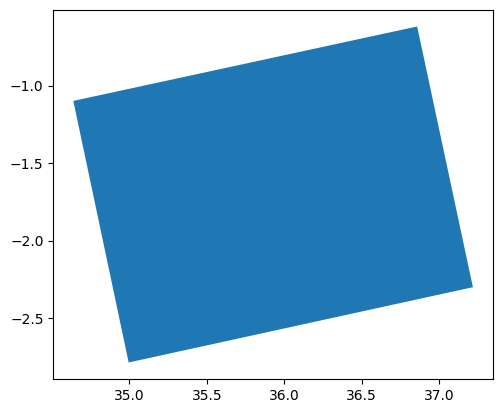

In [3]:
#%% Read the stack file from the ./data/stack.pkl file
with open('./data/stack.pkl', 'rb') as f:
    stack = pickle.load(f)[0]

# Get the supermaser sceneby looping over the stack and get the scene with
# zero perpendicular and temporal baselines
for i in stack:
    if i.properties['perpendicularBaseline'] == 0 and i.properties['temporalBaseline'] == 0:
        super_master = i

print(super_master.properties['fileID'])

aoi_geo = super_master.geometry['coordinates']
aoi = 'POLYGON((%0.5f %0.5f, %0.5f %0.5f, %0.5f %0.5f, %0.5f %0.5f, %0.5f %0.5f))' %(aoi_geo[0][0][0], 
       aoi_geo[0][0][1], aoi_geo[0][1][0], aoi_geo[0][1][1], aoi_geo[0][2][0], aoi_geo[0][2][1], 
       aoi_geo[0][3][0], aoi_geo[0][3][1], aoi_geo[0][0][0], aoi_geo[0][0][1])

#convert the aoi to a shapely polygon
aoi = wkt.loads(aoi)

df = gpd.GeoDataFrame({'geometry':aoi}, index=[0], crs=4326)
df.plot()

#% Get the centroid of the aoi
centroid = aoi.centroid
print(centroid.x, centroid.y)

In [4]:
#%% Plot the supermaster scene and the slave scenes on top of it using the geopandas folium libraries
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=7, tiles="CartoDB positron")
for i, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    # folium.Popup(r["BoroName"]).add_to(geo_j)
    geo_j.add_to(m)
m

POLYGON ((34.64391 -1.09723, 35.00116 -2.78498, 37.22049 -2.29982, 36.86071 -0.61766, 34.64391 -1.09723))
POLYGON ((34.64408 -1.09816, 35.00137 -2.78577, 37.22069 -2.30056, 36.86089 -0.61853, 34.64408 -1.09816))
POLYGON ((34.64394 -1.09798, 35.00121 -2.7856, 37.22058 -2.30038, 36.86079 -0.61836, 34.64394 -1.09798))
POLYGON ((34.64339 -1.09756, 35.00061 -2.78505, 37.21997 -2.29988, 36.86023 -0.61797, 34.64339 -1.09756))
POLYGON ((34.64324 -1.09789, 35.00048 -2.78538, 37.21991 -2.30012, 36.86013 -0.61822, 34.64324 -1.09789))


<AxesSubplot: >

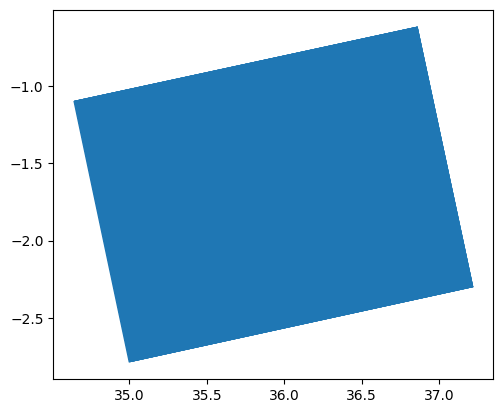

In [5]:
#%% Add the other polygons for the other frames to the df and plot them
for i in stack[0:5]:
   aoi_slave = i.geometry['coordinates']
   pol = 'POLYGON((%0.5f %0.5f, %0.5f %0.5f, %0.5f %0.5f, %0.5f %0.5f, %0.5f %0.5f))' %(aoi_slave[0][0][0],
            aoi_slave[0][0][1], aoi_slave[0][1][0], aoi_slave[0][1][1], aoi_slave[0][2][0], aoi_slave[0][2][1],
            aoi_slave[0][3][0], aoi_slave[0][3][1], aoi_slave[0][0][0], aoi_slave[0][0][1])
   aoi_wtk  = wkt.loads(pol)
   print(aoi_wtk)
   df.loc[len(df.index)] = {'geometry':aoi_wtk}

df.plot()

In [6]:
#%% Plot the supermaster scene and the slave scenes on top of it using the geopandas folium libraries
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=7, tiles="CartoDB positron")
for i, r in df.iterrows():
    print(i, r)
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange", })
    # folium.Popup(r["BoroName"]).add_to(geo_j)
    geo_j.add_to(m)
m

0 geometry    POLYGON ((34.63814 -1.09914, 34.99536 -2.78677...
Name: 0, dtype: object
1 geometry    POLYGON ((34.64391 -1.09723, 35.00116 -2.78498...
Name: 1, dtype: object
2 geometry    POLYGON ((34.64408 -1.09816, 35.00137 -2.78577...
Name: 2, dtype: object
3 geometry    POLYGON ((34.64394 -1.09798, 35.00121 -2.7856,...
Name: 3, dtype: object
4 geometry    POLYGON ((34.64339 -1.09756, 35.00061 -2.78505...
Name: 4, dtype: object
5 geometry    POLYGON ((34.64324 -1.09789, 35.00048 -2.78538...
Name: 5, dtype: object
